In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
glas_path = "./GISCourse/data/GLAH14_tllz_conus_lulcfilt_demfilt.csv"

In [7]:
glas_df = pd.read_csv(glas_path)

In [8]:
glas_df.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31


**Basic info about dataset**

In [9]:
glas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65236 entries, 0 to 65235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   decyear    65236 non-null  float64
 1   ordinal    65236 non-null  float64
 2   lat        65236 non-null  float64
 3   lon        65236 non-null  float64
 4   glas_z     65236 non-null  float64
 5   dem_z      65236 non-null  float64
 6   dem_z_std  65236 non-null  float64
 7   lulc       65236 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 4.0 MB


**Basic Statistic About data**

In [10]:
glas_df.describe()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
count,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000
mean,2005.945322,732291.890372,40.946798,-115.040612,1791.494167,1792.260964,5.504748,30.339444
std,1.729573,631.766682,3.590476,5.465065,1037.183482,1037.925371,7.518558,3.480576
min,2003.139571,731266.943345,34.999455,-124.482406,-115.550000,-114.570000,0.000000,12.000000
25%,2004.444817,731743.803182,38.101451,-119.257599,1166.970000,1168.240000,0.070000,31.000000
50%,2005.846896,732256.116938,39.884541,-115.686241,1555.730000,1556.380000,1.350000,31.000000
75%,2007.223249,732758.486046,43.453565,-109.816475,2399.355000,2400.072500,9.530000,31.000000
max,2009.775995,733691.238341,48.999727,-104.052336,4340.310000,4252.940000,49.900000,31.000000


**Converting to GeoDataFrame**

In [11]:
gpd.GeoDataFrame(glas_df)

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31
...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31


**Adding geometory point using `gpd.points_from_xy()` method**

In [12]:
help(gpd.points_from_xy)

Help on function points_from_xy in module geopandas.array:

points_from_xy(x, y, z=None, crs=None)
    Generate GeometryArray of shapely Point geometries from x, y(, z) coordinates.
    
    In case of geographic coordinates, it is assumed that longitude is captured by
    ``x`` coordinates and latitude by ``y``.
    
    Parameters
    ----------
    x, y, z : iterable
    crs : value, optional
        Coordinate Reference System of the geometry objects. Can be anything accepted by
        :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
        such as an authority string (eg "EPSG:4326") or a WKT string.
    
    Examples
    --------
    >>> import pandas as pd
    >>> df = pd.DataFrame({'x': [0, 1, 2], 'y': [0, 1, 2], 'z': [0, 1, 2]})
    >>> df
       x  y  z
    0  0  0  0
    1  1  1  1
    2  2  2  2
    >>> geometry = geopandas.points_from_xy(x=[1, 0], y=[0, 1])
    >>> geometry = geopandas.points_from_xy(df['x'], df['y'], df['z'])
    >>> gdf = geopanda

In [13]:
geo_array = gpd.points_from_xy(glas_df.lon, glas_df.lat)
geo_array

<GeometryArray>
[<POINT (-105.357 44.158)>,  <POINT (-105.358 44.15)>,
 <POINT (-105.358 44.149)>, <POINT (-105.359 44.147)>,
 <POINT (-105.359 44.146)>, <POINT (-105.359 44.144)>,
 <POINT (-105.363 44.127)>, <POINT (-105.374 44.074)>,
 <POINT (-105.374 44.073)>, <POINT (-105.374 44.071)>,
 ...
 <POINT (-117.043 37.888)>,  <POINT (-117.043 37.89)>,
 <POINT (-117.044 37.892)>, <POINT (-117.044 37.893)>,
 <POINT (-117.044 37.895)>, <POINT (-117.044 37.896)>,
 <POINT (-117.045 37.898)>, <POINT (-117.045 37.899)>,
 <POINT (-117.045 37.901)>, <POINT (-117.046 37.902)>]
Length: 65236, dtype: geometry

### Assigning Geometry column to GeoDataFrame

In [14]:
glas_gdf = gpd.GeoDataFrame(glas_df, geometry=geo_array)
glas_gdf

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-105.35656 44.1579)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-105.35812 44.15018)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-105.35843 44.14863)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-105.35874 44.14709)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-105.35905 44.14554)
...,...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31,POINT (-117.0444 37.89622)
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31,POINT (-117.04468 37.89777)
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31,POINT (-117.04495 37.89932)
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31,POINT (-117.04523 37.90087)


Now we will add crs information to the dataset but before that we need to store and inspect the geometry data so that we can compare.

In [15]:
glas_gdf.geometry

0         POINT (-105.35656 44.1579)
1        POINT (-105.35812 44.15018)
2        POINT (-105.35843 44.14863)
3        POINT (-105.35874 44.14709)
4        POINT (-105.35905 44.14554)
                    ...             
65231     POINT (-117.0444 37.89622)
65232    POINT (-117.04468 37.89777)
65233    POINT (-117.04495 37.89932)
65234    POINT (-117.04523 37.90087)
65235    POINT (-117.04551 37.90242)
Name: geometry, Length: 65236, dtype: geometry

**Inspecting CRS information**

In [16]:
glas_gdf.crs

Note: there is no crs information is associtated with out dataset. So, now we need to add it manually.

## Applying the crs information

CRS information is stored inside the `GeoDataFrame.crs` attribute. Now we will assing the crs code inside this. 

In [17]:
glas_gdf.crs = "EPSG:4326"

In [18]:
glas_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**explanation**

1. **Geographic 2D CRS: EPSG:4326**
   - **Meaning**: This is a specific type of coordinate system used for mapping. "EPSG:4326" is a code that uniquely identifies this system.

2. **Name: WGS 84**
   - **Meaning**: The name of this coordinate system is "WGS 84," which stands for World Geodetic System 1984. It's the standard coordinate system used globally, especially for GPS.

3. **Axis Info [ellipsoidal]**
   - **Lat[north]: Geodetic latitude (degree)**: The latitude axis measures how far north or south a point is from the Equator, in degrees.
   - **Lon[east]: Geodetic longitude (degree)**: The longitude axis measures how far east or west a point is from the Prime Meridian, also in degrees.

4. **Area of Use**
   - **name: World**: This coordinate system is used for mapping the entire world.
   - **bounds: (-180.0, -90.0, 180.0, 90.0)**: These are the geographical boundaries of the coordinate system, covering the entire globe from -180° to 180° longitude and from -90° to 90° latitude.

5. **Datum: World Geodetic System 1984 ensemble**
   - **Ellipsoid: WGS 84**: The shape of the Earth is approximated by an ellipsoid called WGS 84. This ellipsoid is used as the reference shape for this coordinate system.
   - **Prime Meridian: Greenwich**: The zero longitude line (Prime Meridian) used in this system passes through Greenwich, England.

### Summary

- **EPSG:4326**: A code for this specific geographic coordinate system.
- **WGS 84**: The name of the coordinate system, widely used for global mapping and GPS.
- **Latitude and Longitude**: The axes used to define locations on the Earth's surface in degrees.
- **Area of Use**: Covers the entire world.
- **Datum**: Uses the WGS 84 ellipsoid and the Greenwich Prime Meridian as reference points.


## More on EPSG:4326

### Geographic 2D CRS: EPSG:4326

**EPSG:4326**, also known as **WGS 84**, is one of the most widely used geographic coordinate systems. Let's dive into why it's so important, when to use it, and some critical points related to this CRS.

### Why We Use EPSG:4326

1. **Global Standard**:
   - **WGS 84** is the standard coordinate system used by the Global Positioning System (GPS). This makes it universally recognized and compatible with most geospatial data and tools.
   - It provides a consistent framework for mapping and navigation across the globe.

2. **Simplicity and Universality**:
   - Uses latitude and longitude in degrees, which are intuitive and easy to understand.
   - Suitable for global datasets, making it ideal for applications that require a universal reference system.

3. **Compatibility**:
   - Widely supported by GIS software, web mapping services (like Google Maps), and various geospatial applications.
   - Ensures interoperability between different systems and datasets.

### When to Use EPSG:4326

1. **Global Mapping and Navigation**:
   - Ideal for applications that require a global perspective, such as world maps, global navigation systems, and satellite imagery.
   - Used in GPS devices for accurate location tracking.

2. **Data Exchange**:
   - When sharing geospatial data between different organizations or systems, EPSG:4326 is often the preferred CRS due to its widespread acceptance.

3. **Web Mapping**:
   - Commonly used in web mapping applications because it provides a straightforward way to represent locations on a global scale.

### Situations Where EPSG:4326 is Suitable

1. **Environmental Monitoring**:
   - Tracking global phenomena like climate change, deforestation, and wildlife migration.
   - Example: Monitoring the spread of wildfires across continents.

2. **Disaster Response**:
   - Coordinating international aid and relief efforts during natural disasters.
   - Example: Mapping earthquake impact zones to direct rescue operations.

3. **Global Research Projects**:
   - Studies that require a consistent reference system for data collected from different parts of the world.
   - Example: Oceanographic research tracking currents and marine life across oceans.

### Critical Points Related to EPSG:4326

1. **Distortion**:
   - As a geographic coordinate system, EPSG:4326 does not account for the Earth's curvature when measuring distances and areas. This can lead to inaccuracies, especially over large areas.
   - For precise distance and area calculations, a projected coordinate system might be more appropriate.

2. **Datum**:
   - EPSG:4326 uses the WGS 84 datum, which approximates the shape of the Earth as an ellipsoid. This datum is crucial for ensuring the accuracy of the coordinates.
   - Different datums can result in slight variations in coordinates, so it's important to be consistent.

3. **Resolution**:
   - Latitude and longitude coordinates can be specified to varying degrees of precision, allowing for detailed location data.
   - However, for very high-precision applications, additional corrections and transformations might be necessary.

4. **Interoperability**:
   - Ensures that data from different sources can be combined and used together without significant issues.
   - Example: Combining satellite imagery with ground-based observations for comprehensive analysis.

### Summary

EPSG:4326 (WGS 84) is a versatile and widely used geographic coordinate system that provides a global standard for mapping and navigation. It's ideal for applications requiring a universal reference system, such as GPS, web mapping, and global research. However, for tasks requiring precise distance and area measurements, a projected coordinate system might be more suitable.

In [19]:
glas_gdf = gpd.GeoDataFrame(glas_df, crs="EPSG:4326", 
           geometry=gpd.points_from_xy(glas_df["lon"], glas_df["lat"]) )

glas_gdf

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-105.35656 44.1579)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-105.35812 44.15018)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-105.35843 44.14863)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-105.35874 44.14709)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-105.35905 44.14554)
...,...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31,POINT (-117.0444 37.89622)
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31,POINT (-117.04468 37.89777)
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31,POINT (-117.04495 37.89932)
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31,POINT (-117.04523 37.90087)


In [20]:
glas_gdf = gpd.GeoDataFrame(glas_df, crs="EPSG:4326", 
           geometry=gpd.points_from_xy(glas_df["lon"], glas_df["lat"]) )
glas_gdf

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-105.35656 44.1579)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-105.35812 44.15018)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-105.35843 44.14863)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-105.35874 44.14709)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-105.35905 44.14554)
...,...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31,POINT (-117.0444 37.89622)
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31,POINT (-117.04468 37.89777)
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31,POINT (-117.04495 37.89932)
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31,POINT (-117.04523 37.90087)


<Axes: >

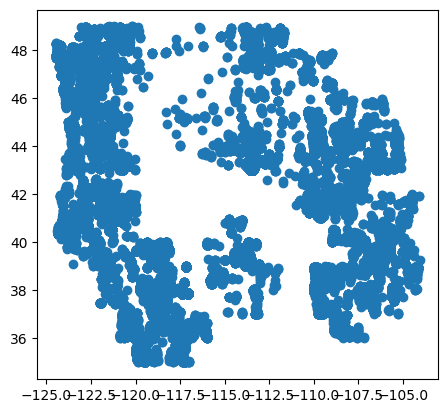

In [21]:
glas_gdf.plot()

## Plotting with color map 

<Axes: >

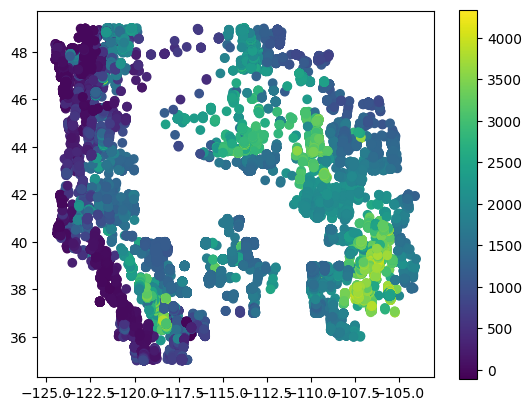

In [22]:
glas_gdf.plot(column="glas_z", legend=True)

Note: In above chart our tick locators are overlapping, to solve this problem we need to set the new tick locator. we can do this by using `ax.axis.set_major_locator()` method or `ax.set_xticks()` method. 

In [23]:
from matplotlib.ticker import FixedLocator 

**Re-setting xticks using `set_xtick` method**

<Axes: >

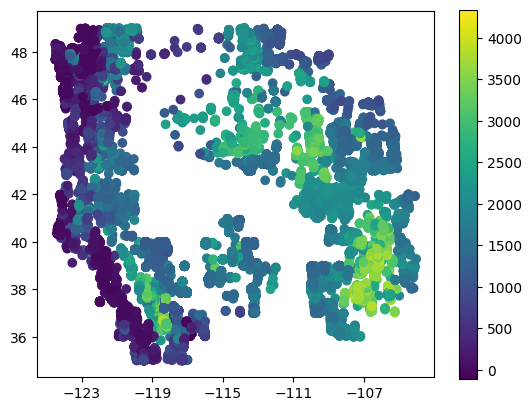

In [24]:
fig, ax = plt.subplots()
xticks = range(-135,-102, 4)
ax.set_xticks(xticks)
glas_gdf.plot(ax=ax, column="glas_z", legend=True)

**Re-setting locators using `set_major_locator**

<Axes: >

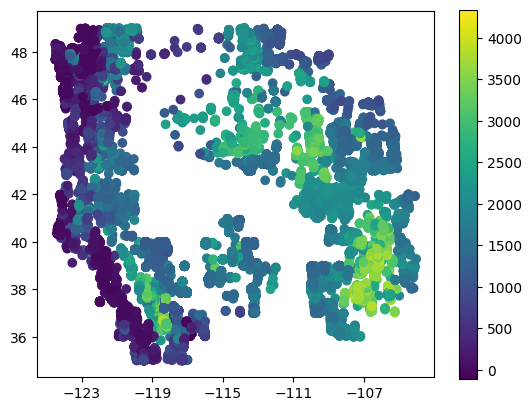

In [25]:
fig, ax = plt.subplots()
xticks = range(-135,-102, 4)
locs = FixedLocator(xticks)
ax.xaxis.set_major_locator(locs)
glas_gdf.plot(ax=ax, column="glas_z", legend=True)

### ReProjecting the GeoDataFrame

Now we will reporject our GeoDataFrame into another Coordinate Reference System `CRS` using `GeoDataFrame.to_crs` method

In [26]:
glas_gdf_proj = glas_gdf.to_crs("EPSG:3857")
glas_gdf_proj.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-11728238.834 5489909.71)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-11728411.824 5488711.598)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-11728446.444 5488472.212)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-11728481.065 5488232.521)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-11728515.574 5487992.837)


**Inspecting the CRS Information of New Projection**

In [27]:
glas_gdf_proj.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Explanation**

1. **Derived Projected CRS: EPSG:3857**
   - **Meaning**: This is a specific type of coordinate system used for mapping. "EPSG:3857" is a code that uniquely identifies this system.

2. **Name: WGS 84 / Pseudo-Mercator**
   - **Meaning**: The name of this coordinate system is "WGS 84 / Pseudo-Mercator." It's commonly used for web mapping applications like Google Maps.

3. **Axis Info [cartesian]**
   - **X[east]: Easting (metre)**: The X-axis represents the east-west direction, measured in meters.
   - **Y[north]: Northing (metre)**: The Y-axis represents the north-south direction, also measured in meters.

4. **Area of Use**
   - **name: World between 85.06°S and 85.06°N**: This coordinate system is used for mapping the world, but only between latitudes 85.06° South and 85.06° North.
   - **bounds: (-180.0, -85.06, 180.0, 85.06)**: These are the geographical boundaries of the coordinate system, covering the entire globe from -180° to 180° longitude and from -85.06° to 85.06° latitude.

5. **Coordinate Operation**
   - **name: Popular Visualisation Pseudo-Mercator**: This is the name of the mathematical method used to project the Earth's surface onto a flat map.
   - **method: Popular Visualisation Pseudo Mercator**: This method is specifically designed for visualizing maps on screens, making it popular for web maps.

6. **Datum: World Geodetic System 1984 ensemble**
   - **Ellipsoid: WGS 84**: The shape of the Earth is approximated by an ellipsoid called WGS 84. This ellipsoid is used as the reference shape for this coordinate system.
   - **Prime Meridian: Greenwich**: The zero longitude line (Prime Meridian) used in this system passes through Greenwich, England.

### Summary

- **EPSG:3857**: A code for this specific map projection system.
- **WGS 84 / Pseudo-Mercator**: The name of the projection system, commonly used for web maps.
- **X and Y Axes**: Represent east-west and north-south directions in meters.
- **Area of Use**: Covers most of the world, except the extreme polar regions.
- **Coordinate Operation**: Uses a method designed for visualizing maps on screens.
- **Datum**: Uses the WGS 84 ellipsoid and the Greenwich Prime Meridian as reference points.

### Plotting EPSG:4326 and EPSG:3857

<Axes: >

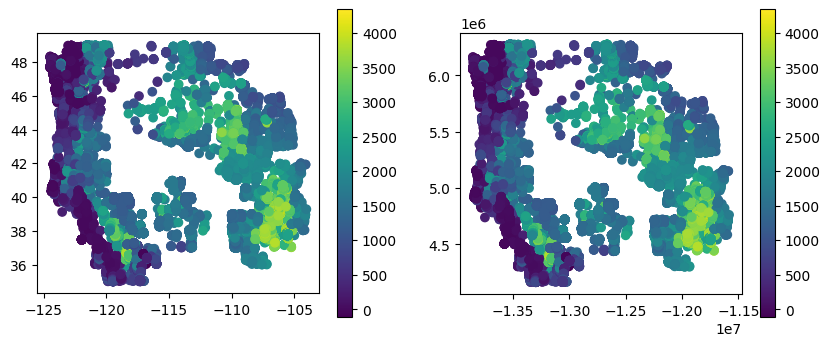

In [28]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(10,4))

glas_gdf.plot(ax=ax1, column="glas_z", legend=True)
glas_gdf_proj.plot(ax=ax2, column="glas_z", legend=True)

### Proj String

In [29]:
glas_gdf.crs.to_proj4()

G:\WorkData\Programming\Python\GIS Data Science\workspace\gis-env\lib\site-packages\pyproj\crs\crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


'+proj=longlat +datum=WGS84 +no_defs +type=crs'

In [30]:
proj_string =  glas_gdf_proj.crs.to_proj4()
print(proj_string)

+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs


## World Data

Now we will load World vector data. first we will plot the whole world map then we will select _USA_ area from world map and plot it.

Now first we will load the 'natulaearth_lowers' dataset using geodatasets liberary API.

In [31]:
import geodatasets

In [32]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [33]:
geodatasets.get_url("naturalearth.land")

'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip'

In [34]:
eland_path = geodatasets.get_path("naturalearth.land")

In [35]:
eland = gpd.read_file(eland_path)

In [36]:
eland

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,Land,0,0.0,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,Land,0,0.0,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."


<Axes: >

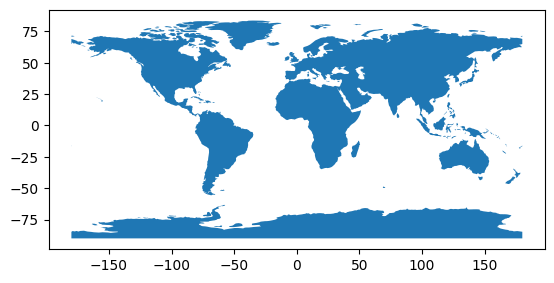

In [37]:
eland.plot()

**Loading another data of world which has the countries field in it**

In [63]:
path = "../Geo Data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

In [64]:
world_data =  gpd.read_file(path)
world_data

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [65]:
world_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 258 entries, 0 to 257
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 316.6+ KB


In [66]:
print(list(world_data.columns))

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [67]:
world_data[["ISO_A3", "NAME"]]

,ISO_A3,NAME
0,IDN,Indonesia
1,MYS,Malaysia
2,CHL,Chile
3,BOL,Bolivia
4,PER,Peru
...,...,...
253,MAC,Macao
254,-99,Ashmore and Cartier Is.
255,-99,Bajo Nuevo Bank
256,-99,Serranilla Bank


<Axes: >

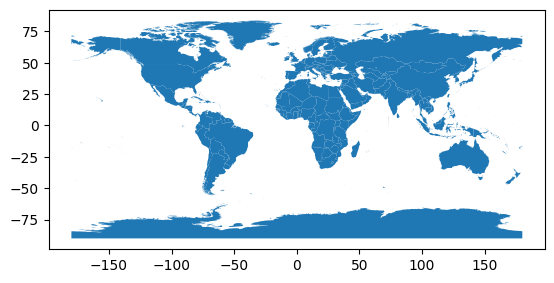

In [68]:
world_data.plot()

In [69]:
eland.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
world_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
glas_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Combining thhe glas_gdf data with world data.

<Axes: >

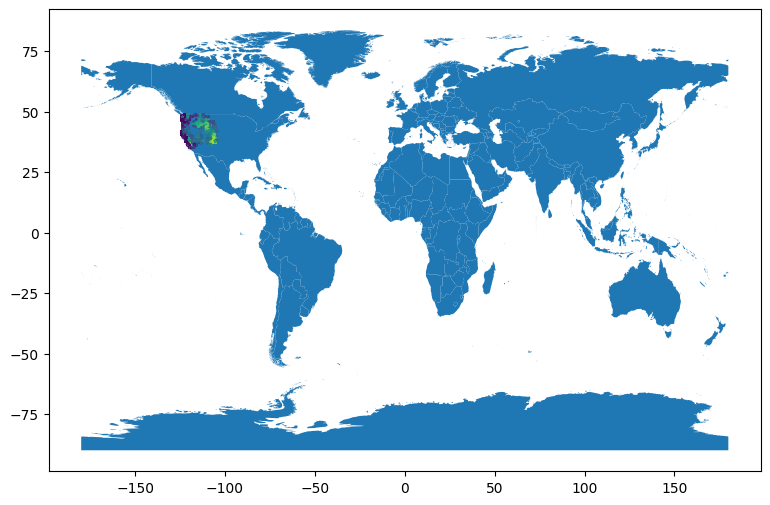

In [58]:
fig, ax = plt.subplots(figsize = (10,6))
world_data.plot(ax=ax)
glas_gdf.plot(ax=ax, column="glas_z", markersize=0.2)

`Note:` Since we can't see data `glas_gdf` data plotting clearly, so now we will zoom on the USA country only so we can analyze data clearly.

In [71]:
usa_data = world_data["ISO_A3"] == "USA"

<Axes: >

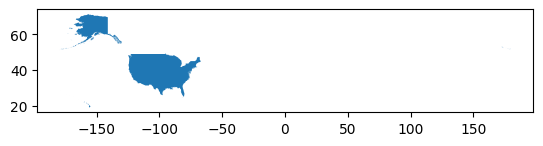

In [73]:
usa_data = world_data[usa_data]
usa_data.plot()

**Setting limits to x-axis and y-axis**

Now we need to reset the axis range limits so we can focus only on the desired area.

(np.float64(-179.1435033839999),
 np.float64(-50.0),
 np.float64(18.906117143000074),
 np.float64(71.41250234600005))

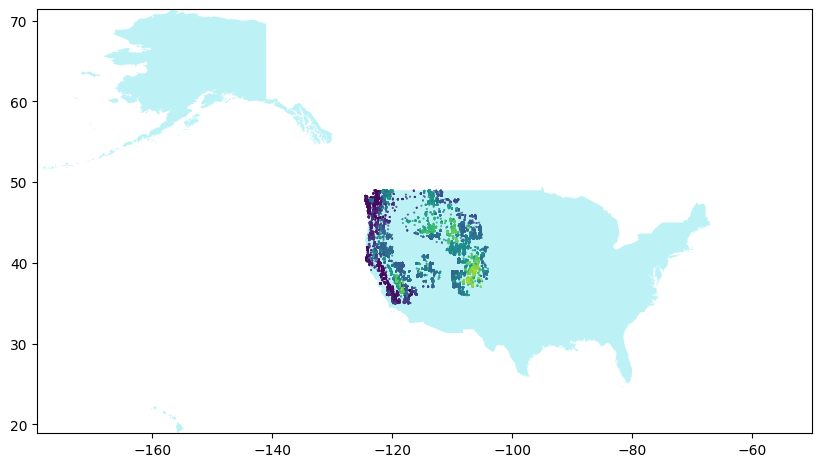

In [85]:
fig, ax = plt.subplots(figsize = (10,6))
usa_data.plot(ax=ax,facecolor='#BCF2F6')
glas_gdf.plot(ax=ax, column="glas_z", markersize=0.2)
bounds = usa_data.total_bounds
xmin,ymin,xmax,ymax = bounds
xmax = -50
ax.axis([xmin,xmax,ymin,ymax])